In [1]:
import sys  
sys.path.insert(1, '/home/eop/code/dopamine/dopamine/jax/agents/quantile')
from test_iqn import *

params = train_quantile_model()

/home/eop/.virtualenvs/dopamine/lib/python3.10/site-packages/tensorflow/python/framework/dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
2024-03-14 15:00:15.206589: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eop/.virtualenvs/dopamine/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-14 15:00:15.206735: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eop/.virtualenvs/dopamine/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-14 15:00:15.206742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT 

Loss step 0:  17758.004
Loss step 10:  12454.646
Loss step 20:  11685.199
Loss step 30:  10591.248
Loss step 40:  9785.815
Loss step 50:  8351.221
Loss step 60:  6832.1094
Loss step 70:  5434.63
Loss step 80:  4757.8335
Loss step 90:  4150.4297
Loss step 100:  2687.3376


In [2]:
num_test_quant = 10 
x_batched = jnp.arange(data.income.min(), data.income.max(), 20)[:, None]

def online(state, key):
    return network_def.apply(params, state, num_quantiles=num_test_quant,
                             rng=key)

batched_rng = jnp.stack(jax.random.split(key1, num=x_batched.shape[0]))

model_output = jax.vmap(online)(x_batched, batched_rng)
quantile_values = model_output.quantile_values
quantiles = model_output.quantiles

quantile_values.shape

(56, 10, 1)

Text(0, 0.5, 'Food expenditure')

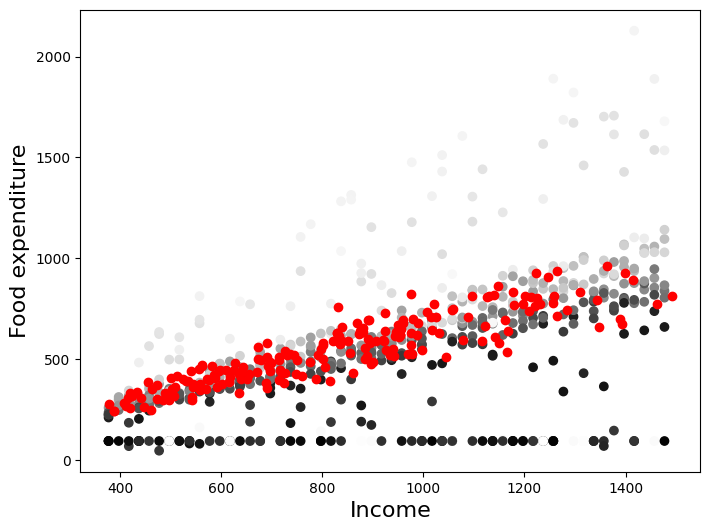

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(num_test_quant):
    y = quantile_values[:, i, :].squeeze()
    q = quantiles[:, i].squeeze().tolist()
    col = list(zip(q, q, q))
    ax.scatter(x_batched.squeeze(), y, c=col)
ax.scatter(data.income, data.foodexp, c='r')
ax.set_xlabel("Income", fontsize=16)
ax.set_ylabel("Food expenditure", fontsize=16)

In [4]:
params

{'params': {'Dense_0': {'bias': Array([3.9950948], dtype=float32),
   'kernel': Array([[-4.318126  ],
          [-2.4220197 ],
          [-1.4824516 ],
          [-1.0244243 ],
          [ 0.11297628],
          [-0.5397844 ],
          [ 0.26984912],
          [-1.643297  ],
          [-0.5495835 ],
          [-2.6711366 ],
          [-1.0713254 ],
          [-2.2384179 ],
          [-0.00794283],
          [-0.86521834],
          [ 1.177821  ],
          [ 0.48818097],
          [ 1.5665139 ],
          [ 0.27873582],
          [ 1.0305359 ],
          [-0.5161109 ],
          [ 0.35186222],
          [-0.9929146 ],
          [ 0.47510293],
          [-0.6417402 ],
          [ 1.2017212 ],
          [-0.21914199],
          [ 1.3084584 ],
          [-0.03587291],
          [ 1.2639602 ],
          [-0.31056333],
          [ 0.45969844],
          [-0.2922874 ]], dtype=float32)},
  'Dense_1': {'bias': Array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
           0.   

(0    255.839425
 1    310.958667
 2    485.680014
 3    402.997356
 4    495.560775
 Name: foodexp, dtype: float64,
 Array([226.4222 , 270.76608, 185.09396, 255.89201, 304.87677], dtype=float32),
 Array(1606.325, dtype=float32))

In [14]:
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775
